In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors

from local import *

In [2]:
DATA = DataVtutk151u()

In [3]:
h = lambda x: 0.12 * x
s = lambda x: 1.0
v = lambda x: 0.75
hsv = lambda x: matplotlib.colors.hsv_to_rgb((h(x), s(x), v(x)))
COLORS = {
    "D1-5": hsv(0),
    "D6":   hsv(1),
    "D7":   hsv(2),
    "D8":   hsv(3),
    "D9":   hsv(4),
    "D10":  hsv(5),
}

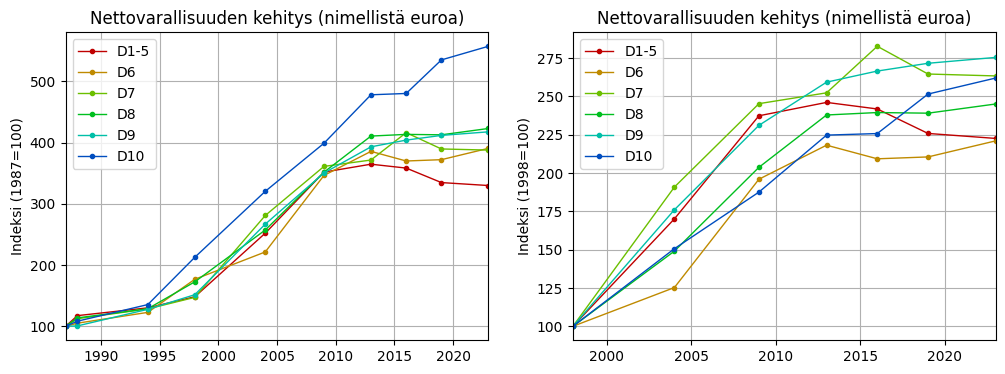

In [6]:
def partial(ax, i, j):
    for cls in DATA.classes2:
        x = DATA.years[i:j]
        #y = DATA.by_year(cls, "net", "me_n")[i:j] - DATA.by_year(cls, "net2", "me_n")[i:j]
        y = DATA.by_year(cls, "rvar", "me_n")[i:j]
        y = 100 * y / y[0]
        ax.plot(x, y, color=COLORS[cls], linewidth=1, marker=".", label=f"{cls}")
    ax.legend()
    ax.set_xlim(x[0], x[-1])
    ax.set_ylabel(f"Indeksi ({x[0]}=100)")
    ax.set_title(f"Nettovarallisuuden kehitys (nimellistä euroa)")
    ax.grid(True)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
partial(ax[0], 0, None)
partial(ax[1], 3, None)
plt.savefig("kehitys_n.png", dpi=150, bbox_inches="tight")

In [ ]:
i0 = 0
for cls in DATA.classes2:
    x = DATA.years[i0:]
    y = DATA.by_year(cls, "net", "sz")[i0:]
    plt.plot(x, y, color=COLORS[cls], label=f"{cls}")
plt.legend()

In [ ]:
DATA.table.values